## Table of Contents
* [1. Attribute Description](#variables)
* [2. Project Outline](#outline)
    * [a. Campaign Performance Report](#report)   
        * [i) How did the campaign go?](#performance)   
        * [ii) Who Responded?](#responder_profile)
        * [iii) Response Rates by Different Cuts](#rates_by_cuts)
        * [iv) Subscription Rate by Number of Contacts](#marginal_rates)

## Attribute Description <a class="anchor" id="variables"></a>

### i) Bank Client Data:
    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","unknown","unemployed","management",
                                        "housemaid","entrepreneur","student", "blue-collar",
                                        "self-employed","retired", "technician","services")
    3 - marital : marital status (categorical: "married","divorced","single"; 
                                         note: "divorced" means divorced or widowed) 
    4 - education (categorical: "unknown","secondary","primary","tertiary") 
    5 - default: has credit in default? (binary: "yes","no") 
    6 - balance: average yearly balance, in euros (numeric) 
    7 - housing: has housing loan? (binary: "yes","no") 
    8 - loan: has personal loan? (binary: "yes","no") 
### ii) Related with the last contact of the current campaign:
    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
    10 - day: last contact day of the month (numeric) 
    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
    12 - duration: last contact duration, in seconds (numeric) 
### iii) Other Attributes:
    13 - campaign: number of contacts performed during the campaign for this client (numeric, includes last contact)
    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
               (numeric, -1 means client was not previously contacted)
    15 - previous: number of contacts performed before this campaign and for this client (numeric)
    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### iv) Output Variable (desired target):
    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import warnings

%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bank-full.csv', sep = ';')

## Quick QC of the Dataset

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Campaign Performance Report <a class="anchor" id="report"></a>
## 1) How did the Campaign go? <a class="anchor" id="performance"></a>
    
### Overall Performance

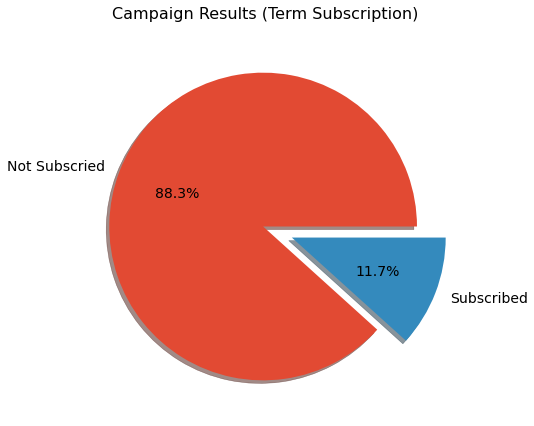

In [6]:
f, ax = plt.subplots(figsize=(8,6))

labels =["Not Subscried", "Subscribed"]

plt.suptitle('Campaign Results (Term Subscription)', fontsize=16)

pie_chart = data["y"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', shadow=True, 
                                              #colors= ['darkorange','green'], 
                                              labels=labels, fontsize=14)
ax.set_ylabel('', fontsize=16, labelpad= 0)

plt.tight_layout()
plt.show()

In [7]:
data = assign_year_mth_qtr(data)

## 2) Who Responded? <a class="anchor" id="responder_profile"></a>
- **Profile Analysis**  
    a) Variables considered for the profile analysis  
    b) Sumnmary - Responder vs. Non Responder  
    c) Summary - Existing Customer vs. Prospect  
    
### Customer Profiles (Responder vs. Non-Responder     |      Prospect vs. Existing Customer)

#### a) Variables considered for the profile analysis
- Average Age
- Marital Status
- Education
- Occuapation
- Mortgage
- Default
- Other Loan
- Median Balance

#### b) Summary - Responder vs. Non Responder

Responders are **more likely** to :
- Be Single – more discretionary spending
- Have Higher Education – higher salary and/or financially savvy
- Maintain Higher Balance

Responders are **less likely** to have:
- Blue collar/service job
- Consumer Loans/Mortgages
- Default history


#### c) Summary - Existing Customer vs. Prospect
- There is not much noticeable difference in profile between existing customer and prospects (* Prospect : New-to-Bank/First time Contacted)
- Slightly higher median balances from existing customers (having more time to build balance with the bank?)


In [8]:
data['response'] = data['y'].apply(lambda x: 'Responder' if x == 'yes' else 'Non Responder')
data['cust_type'] = data['previous'].apply(lambda x: 'Prospect' if x == 0 else 'Customer')

In [9]:
responder = data[data['y'] == 'yes']

resp_vs_non_resp = side_by_side_profile(data, 'response')
resp_by_cust_type = side_by_side_profile(responder, 'cust_type')

display_side_by_side(resp_vs_non_resp, resp_by_cust_type)

Non Responder 
 Responder 
 
 
 
 
 
 Volume 
 39922 
 5289 
 
 
 Avg. Age 
 40.8 
 41.7 
 
 
 Marital Status 
 divorced 
 11.48% 
 11.76% 
 
 
 married 
 61.27% 
 52.09% 
 
 
 single 
 27.25% 
 36.15% 
 
 
 Education 
 primary 
 15.68% 
 11.17% 
 
 
 secondary 
 51.98% 
 46.32% 
 
 
 tertiary 
 28.32% 
 37.74% 
 
 
 Occupation 
 admin. 
 11.37% 
 11.93% 
 
 
 blue-collar 
 22.6% 
 13.39% 
 
 
 entrepreneur 
 3.42% 
 2.33% 
 
 
 housemaid 
 2.83% 
 2.06% 
 
 
 management 
 20.43% 
 24.6% 
 
 
 retired 
 4.38% 
 9.76% 
 
 
 self-employed 
 3.49% 
 3.54% 
 
 
 services 
 9.48% 
 6.98% 
 
 
 student 
 1.68% 
 5.09% 
 
 
 technician 
 16.93% 
 15.88% 
 
 
 unemployed 
 2.76% 
 3.82% 
 
 
 
 housing 
 58.1% 
 36.59% 
 
 
 default 
 1.91% 
 0.98% 
 
 
 loan 
 16.93% 
 9.15% 
 
 
 Median Balance ($) 
 $417.0 
 $733.0 
 
 
 
 
 
 
 
 Customer 
 Prospect 
 
 
 
 
 
 Volume 
 1905 
 3384 
 
 
 Avg. Age 
 42.5 
 41.2 
 
 
 Marital Status 
 divorced 
 9.66% 
 12.94% 
 
 
 married 
 55.12% 
 50.38% 
 
 
 single 
 35.22% 
 36.67% 
 
 
 Education 
 primary 
 9.08% 
 12.35% 
 
 
 secondary 
 44.88% 
 47.13% 
 
 
 tertiary 
 41.0% 
 35.9% 
 
 
 Occupation 
 admin. 
 13.07% 
 11.29% 
 
 
 blue-collar 
 9.66% 
 15.48% 
 
 
 entrepreneur 
 1.42% 
 2.84% 
 
 
 housemaid 
 1.78% 
 2.22% 
 
 
 management 
 27.4% 
 23.02% 
 
 
 retired 
 10.81% 
 9.16% 
 
 
 self-employed 
 3.41% 
 3.61% 
 
 
 services 
 6.25% 
 7.39% 
 
 
 student 
 6.25% 
 4.43% 
 
 
 technician 
 14.8% 
 16.49% 
 
 
 unemployed 
 4.3% 
 3.55% 
 
 
 
 housing 
 34.17% 
 37.94% 
 
 
 default 
 0.26% 
 1.39% 
 
 
 loan 
 6.35% 
 10.73% 
 
 
 Median Balance ($) 
 $883.0 
 $674.0

In [10]:
side_by_side_profile(responder, 'year')

2008    2009    2010
               Volume                1401    2536    1352
               Avg. Age              40.2    41.5    43.4
Marital Status divorced            16.13%  10.92%    8.8%
               married             54.39%  50.87%   52.0%
               single              29.48%  38.21%   39.2%
Education      primary             13.92%  10.84%   8.95%
               secondary           50.89%  44.64%  44.75%
               tertiary            31.91%  40.06%  39.42%
Occupation     admin.              10.14%   12.7%  12.35%
               blue-collar          21.7%  12.03%   7.32%
               entrepreneur         4.07%   1.85%   1.41%
               housemaid            2.28%   1.93%   2.07%
               management          22.41%  25.71%  24.78%
               retired              3.93%  10.29%  14.79%
               self-employed        4.14%   3.43%   3.11%
               services             8.49%   7.14%    5.1%
               student              0.93%    5.4%    8.8%
               technician          18.42%  15.18%  14.57%
               unemployed           3.07%   3.63%   4.96%
               housing             51.82%  37.22%   19.6%
               default               2.5%   0.63%   0.07%
               loan                 17.2%   7.22%   4.44%
               Median Balance ($)  $566.0  $785.5  $868.0

# iii) Response Rates by Different Cuts<a class="anchor" id="rates_by_cuts"></a>

- **Months**
    - Higher response rates observed in September through December as customers tend to reevaluate their finances towards the end of the year
    - March and April also shows relatively higher response rates likely due to upcoming tax season during April and May
- **Contact Channel**
    - Cellular showed the highest response rates
- **Education**
    - Teritary group showed the highest response rates
- **Martial Status**
    - Single goroup showed the highest response rates (less financially burdened compared to the other groups)
- **Job**
    - Students and retired group showed the highest response rates (Risk adverse populations)
- **Loan Status**
    - As expected, targets with loans or default history would have lower discretionary spend and hence are less keen to subscribe to a term deposit
- **Age and Balance**
    - No significant difference observed from the distributions of Age and Balance 
- **Call Duration**
    - People who subscribed to a term deposit tend to have a longer call duration

### Subscription Rate (%) by Communcation Type and Month

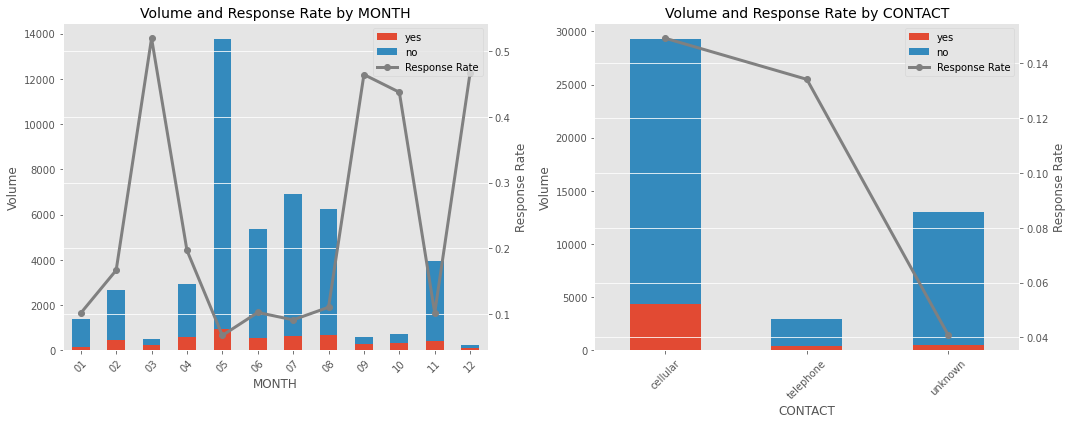

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,6))
subscr_rate_by_col(data, 'month', ax1)
subscr_rate_by_col(data, 'contact', ax2)

### Subscription Rate (%) by Categorical Variables

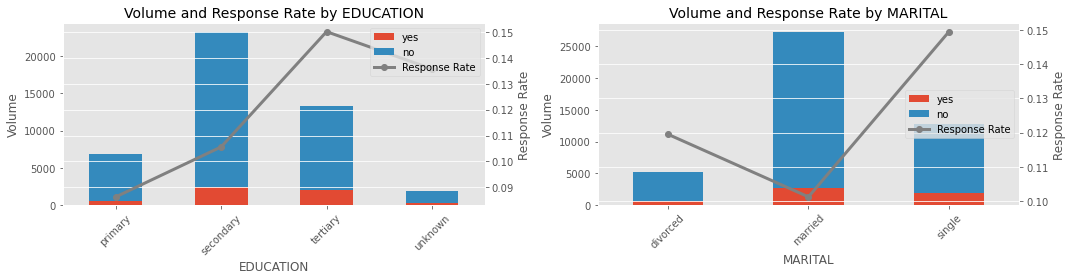

In [12]:
fig, (ax1, ax2)= plt.subplots(1,2,figsize = (15,4))
subscr_rate_by_col(data, 'education', ax1)
subscr_rate_by_col(data, 'marital', ax2, loc =7)

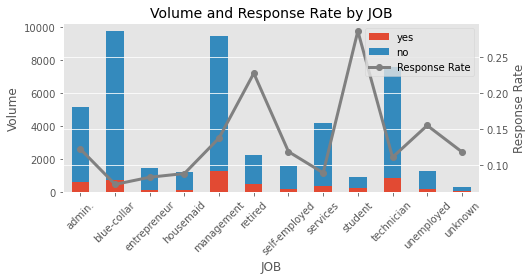

In [13]:
fig, ax1= plt.subplots(1,1,figsize = (7.5,4))
subscr_rate_by_col(data, 'job', ax1)

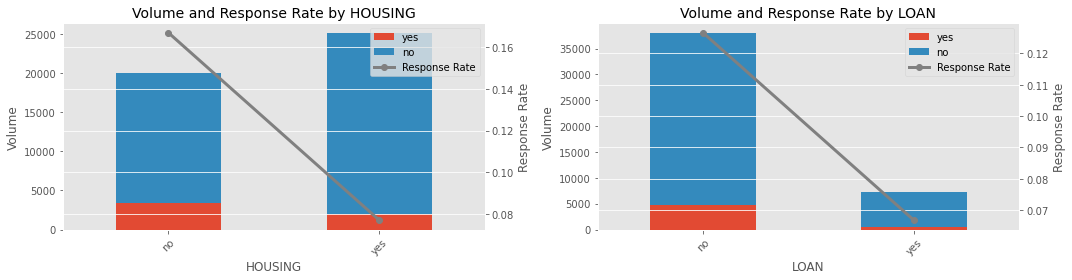

In [14]:
fig, (ax1, ax2)= plt.subplots(1,2,figsize = (15,4))
subscr_rate_by_col(data, 'housing', ax1)
subscr_rate_by_col(data, 'loan', ax2)

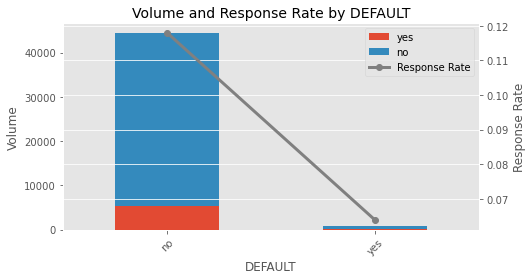

In [15]:
fig, ax1= plt.subplots(1,1,figsize = (7.5,4))
subscr_rate_by_col(data, 'default', ax1)

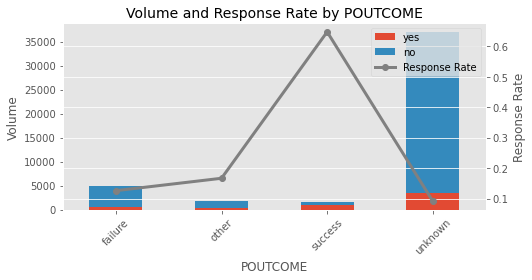

In [16]:
fig, ax1= plt.subplots(1,1,figsize = (7.5,4))
subscr_rate_by_col(data, 'poutcome', ax1)

### Call Duration by Campaign Response

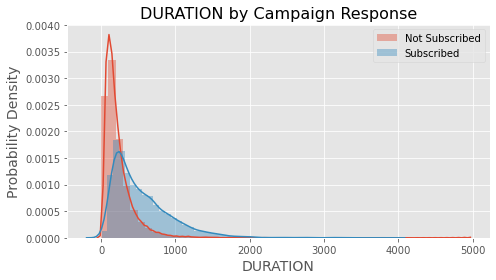

In [17]:
plot_numeric(data, 'duration')

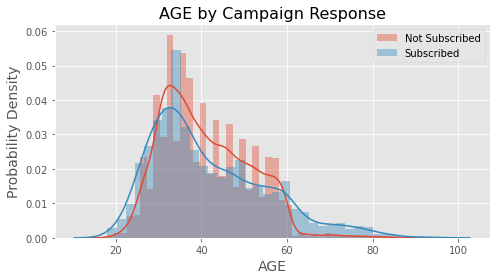

In [18]:
plot_numeric(data, 'age')

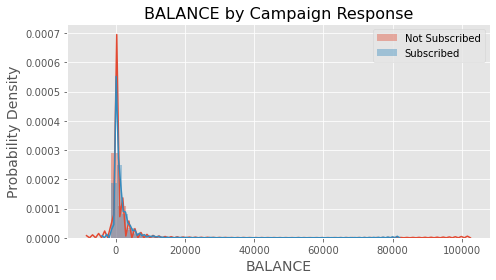

In [19]:
plot_numeric(data, 'balance')

# iv) Subscription Rate by Number of Contacts<a class="anchor" id="marginal_rates"></a>

#### Response Rate and Marginal Response Rate by Number of Contacts
- **Marginal Subscription Rate (%)** by the number of contacts (Table) shows how much conversion opportunity remains after contacting X number of time for each target

- The Marginal Subscription Rate (%) flattens out as number of contacts per target increases

- With threshold of 7 contacts, about 98% of the responses are captured. Hence, to save time and effort, no more than 7 contacts should be attempted for each target

In [20]:
camp_resp = data.groupby(by = ['campaign','y']).size().unstack().fillna(0)
camp_resp['total'] = camp_resp.apply(lambda x: x.sum(), axis = 1)

sample_size = camp_resp['total'].sum()
total_resp = camp_resp['yes'].sum()

camp_resp['num_contact'] = sample_size - pd.Series([0] + camp_resp['total'].tolist()[:-1], index = camp_resp.index).cumsum()
camp_resp['resp_remain'] = total_resp - pd.Series([0] + camp_resp['yes'].tolist()[:-1], index = camp_resp.index).cumsum()

camp_resp['marg_subscr'] = round(camp_resp['yes'] / camp_resp['num_contact'], 4)
camp_resp['marg_resp'] = round(camp_resp['resp_remain'] / camp_resp['num_contact'], 4)

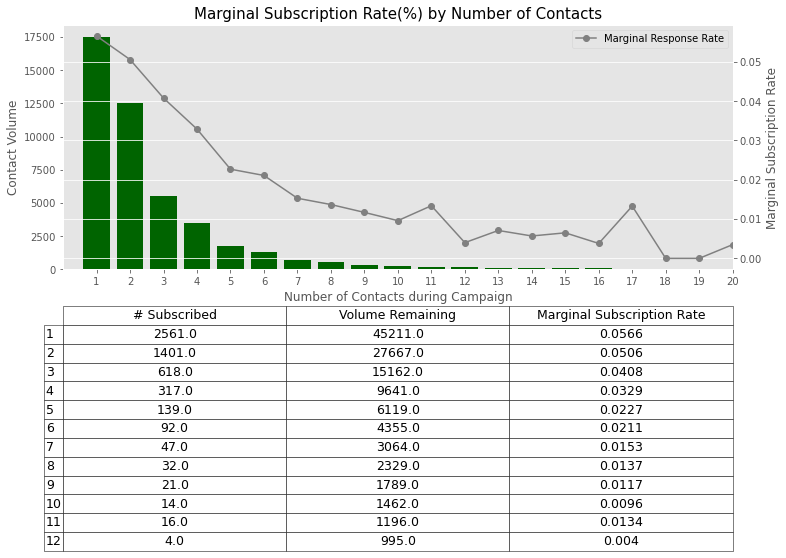

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 4.5))
ax2 = ax1.twinx()

ax1.bar(data = camp_resp, x = camp_resp.index, height = 'total', color = 'darkgreen')
camp_resp.plot(y = 'marg_subscr', kind = 'line', marker='o', ax = ax2, 
               label = 'Marginal Response Rate', color = 'grey', lw = 1.5)

plt.title('Marginal Subscription Rate(%) by Number of Contacts', fontsize = 15)
ax2.set_ylabel('Marginal Subscription Rate')
ax1.set_ylabel('Contact Volume')

ax1.set_xlabel('Number of Contacts during Campaign')
plt.xticks(np.arange(min(camp_resp.index), max(camp_resp.index), step=1)) 
plt.xlim(0,20)

ax1.grid(b=None)

table = camp_resp[['yes','num_contact', 'marg_subscr']].head(12)
table_plot = plt.table(cellText = table.values, 
                           colLabels=['# Subscribed', 'Volume Remaining', 'Marginal Subscription Rate'], 
                           cellLoc='center',
                           rowLabels = table.head(12).index,
                           bbox=[0, -1.15, 1, 1])
table_plot.set_fontsize(12.5)

plt.show()